# Classification
---
Author: Anatoliy Durkin

Updated: 28.02.2025

В данном ноутбуке библиотеки будут импортироваться по мере необходимости, что продиктовано удобством для процесса обучения. Однако напоминаю, что лучше, если все импорты у вас находятся в одной ячейке!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Набор данных по диагностике диабета.

Этот набор данных содержит 9538 медицинских записей , связанных с диагностикой диабета и факторами риска. Он включает различные параметры здоровья, привычки образа жизни и генетические предрасположенности, которые способствуют риску диабета. Данные структурированы с реалистичными распределениями, что делает их ценными для медицинских исследований, статистического анализа и приложений машинного обучения.

---
Описание столбцов:

- Age: The age of the individual (18-90 years).
- Pregnancies: Number of times the patient has been pregnant.
- BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
- Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.
- BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.
- HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.
- LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).
- HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).
- Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.
- WaistCircumference: Waist measurement (cm), an indicator of central obesity.
- HipCircumference: Hip measurement (cm), used to calculate WHR.
- WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.
- FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).
- DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).
- Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).
- MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).
- Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

---
Этот набор данных полезен для изучения взаимосвязей между образом жизни, генетическими факторами и риском развития диабета, предоставляя ценную информацию для прогностического моделирования и аналитики здоровья.

In [4]:
df = pd.read_csv('diabetes_dataset.csv')

Ознакомьтесь с данными, проверьте их на наличие ошибок, пропусков и прочих вещей, которые могут осложнить дальнейшую работу. Ознакомьтесь с типами данных в таблице.

In [10]:
# Ознакомление с данными
print("Первые 5 строк данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nСтатистическое описание данных:")
print(df.describe())

# Проверка на наличие пропусков
print("\nПроверка на пропуски:")
print(df.isnull().sum())

# Проверка на дубликаты
print("\nПроверка на дубликаты:")
print(f"Количество дубликатов: {df.duplicated().sum()}")

Первые 5 строк данных:
   Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0   69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1   32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2   89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3   78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4   38            8  24.56    103.2           74.0    4.7  102.5  29.1   

   Triglycerides  WaistCircumference  HipCircumference   WHR  FamilyHistory  \
0           50.0                90.5             107.9  0.84              0   
1          129.9               113.3              81.4  1.39              0   
2          177.6                84.7             107.2  0.79              0   
3          117.0               108.9             110.0  0.99              0   
4          145.9                84.1              92.8  0.91              0   

   DietType  Hypertension  MedicationUse  Outcome  
0    

Необходимо ли выполнить какую-то предобработку? Сделайте всё, что считаете нужным, всё может сказаться в дальнейшем при построении моделей.


Типы данных после предобработки:
Age                      int64
Pregnancies              int64
BMI                    float64
Glucose                float64
BloodPressure          float64
HbA1c                  float64
LDL                    float64
HDL                    float64
Triglycerides          float64
WaistCircumference     float64
HipCircumference       float64
WHR                    float64
FamilyHistory         category
DietType              category
Hypertension          category
MedicationUse         category
Outcome               category
dtype: object


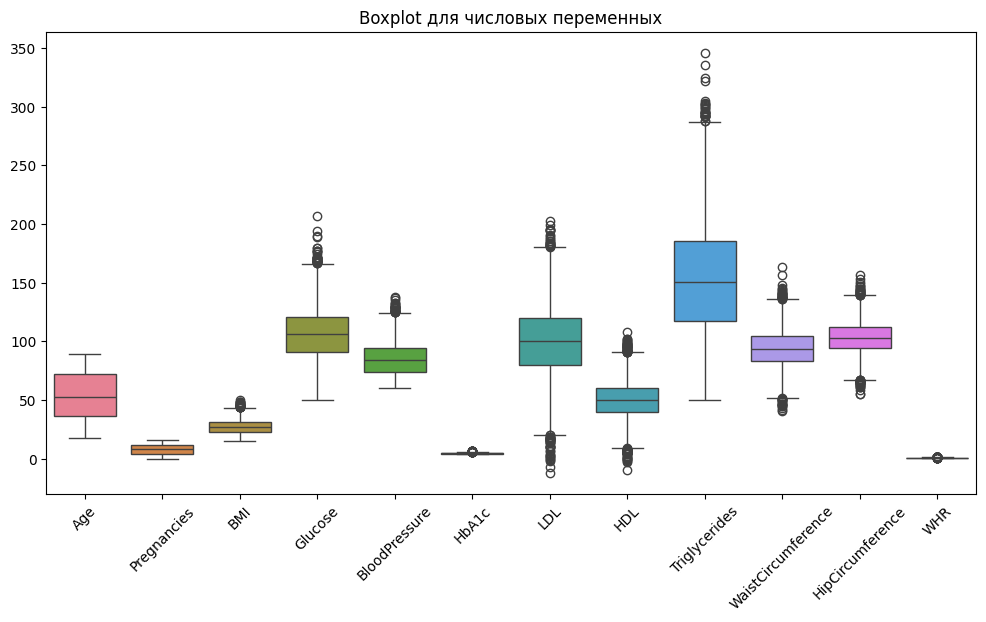


Финальная информация о данных после предобработки:
<class 'pandas.core.frame.DataFrame'>
Index: 9110 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 9110 non-null   int64   
 1   Pregnancies         9110 non-null   int64   
 2   BMI                 9110 non-null   float64 
 3   Glucose             9110 non-null   float64 
 4   BloodPressure       9110 non-null   float64 
 5   HbA1c               9110 non-null   float64 
 6   LDL                 9110 non-null   float64 
 7   HDL                 9110 non-null   float64 
 8   Triglycerides       9110 non-null   float64 
 9   WaistCircumference  9110 non-null   float64 
 10  HipCircumference    9110 non-null   float64 
 11  WHR                 9110 non-null   float64 
 12  FamilyHistory       9110 non-null   category
 13  DietType            9110 non-null   category
 14  Hypertension        9110 non-null   categ

In [15]:
# Предобработка данных
# Удаление дубликатов
df = df.drop_duplicates()

# Заполнение пропусков (если есть) только для числовых столбцов
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Преобразование категориальных переменных в тип 'category'
categorical_columns = ['FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse', 'Outcome']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Проверка типов данных после предобработки
print("\nТипы данных после предобработки:")
print(df.dtypes)

# Проверка на выбросы (например, с помощью boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))  # Выбор только числовых столбцов
plt.title('Boxplot для числовых переменных')
plt.xticks(rotation=45)
plt.show()

# Удаление выбросов (если необходимо)
# Например, можно использовать IQR для определения выбросов
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nФинальная информация о данных после предобработки:")
print(df.info())

## Выборка данных

В разделении данных помогает замечательна функция `train_test_split` из библиотеки `scikit-learn`. Именно этой библиотекой мы в основном будем пользоваться в дальнейшем. Напоминаю, если у вас нет библиотеки, её легко установить через `pip` даже из ячейки ноутбука.

In [ ]:
# Если нужно установить библиотеку:

# !pip install scikit-learn

In [17]:
from sklearn.model_selection import train_test_split

Теперь можем использовать эту функцию для разделения данных. Функция принимает на вход два набора данных (пожаем один с признаками, другой с целевым признаком), аргумент `test_size` позволяет указать долю данных, которую нужно отделить в тестовый набор. Функция автоматически случаным образом разделит датасеты в указанном соотношении, при этом в тестовую часть попадут соответствующие строки из обоих наборов данных.

Также указывается аргумент `random_state`, он не обязателен, но рекомендуется его указывать. Это фиксация сида для генерации рандомных чисел. Таким образом, указывая одно и то же число в этом аргументе, вы получите одно и то же разбиение на выборки. Этот аргумент позволяет сделать ваши манипуляции воспроизводимыми.

Функция возвращает четыре датасета, по два для каждого из переданных, при этом в каждой паре сначала идет обучающая выборка, затем тестовая. Обратите внимание, как мы сохраняем резульатат. Здесь "x" - признаки, "y" - целевой признак.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df['Outcome'], test_size=0.25, random_state=42)

Сравните размеры датасетов, убедитесь, что в тестовой выборке нужное нам количество данных. Сравните индексы датасетов с признаками и целевым признаком, чтобы убедиться, что они совпадают.

In [30]:
# Сравнение размеров датасетов
print(f'Размер обучающей выборки: {x_train.shape[0]}')
print(f'Размер тестовой выборки: {x_test.shape[0]}')

# Сравнение индексов
print(f'Индексы x_train: {x_train.index.tolist()}')
print(f'Индексы y_train: {y_train.index.tolist()}')

# Обучение модели kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

# Вычисление точности
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, knn_predictions)
print(conf_matrix)

Размер обучающей выборки: 6832
Размер тестовой выборки: 2278
Индексы x_train: [839, 7140, 3091, 7768, 8682, 3675, 1290, 7510, 4799, 574, 28, 6702, 3151, 3486, 1354, 5617, 4721, 5281, 1269, 8265, 457, 7295, 5496, 6456, 5100, 8632, 8077, 7504, 5962, 340, 1078, 4318, 7245, 1947, 6825, 558, 8004, 6800, 614, 9454, 1777, 9358, 4804, 514, 6716, 5844, 2364, 4832, 2705, 3831, 3146, 1997, 7164, 3627, 9177, 4718, 3242, 6325, 415, 1370, 3176, 127, 8190, 1633, 2071, 4798, 2267, 8257, 7782, 2435, 601, 3244, 8643, 8955, 8284, 1461, 560, 3658, 6149, 1489, 3816, 1944, 1509, 3034, 6289, 1895, 53, 8834, 4715, 491, 7982, 3472, 5533, 6812, 3131, 1935, 9369, 901, 6220, 4181, 5116, 5388, 4140, 444, 195, 4853, 3268, 237, 9428, 1080, 5226, 2948, 4116, 1984, 8882, 835, 1545, 7497, 3590, 1172, 9055, 6129, 2302, 6022, 8372, 3055, 4586, 8861, 9151, 2238, 6383, 4522, 1702, 7656, 7226, 162, 6658, 3024, 4069, 3037, 7569, 4930, 6730, 4878, 2476, 4374, 8026, 6987, 5809, 2993, 3503, 4314, 882, 8060, 7837, 9410, 9269, 79

## kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn_model = knn.fit(x_train, y_train)

In [23]:
knn_predictions = knn.predict(x_test.values)
knn_predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6738366988586479


Матрица ошибок

---
|           | Predicted: 0 | Predicted:1 |
|-----------|:------------:|:-----------:|
| Actual: 0 | TN           | FP          |
| Actual: 1 | FN           | TP          |

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, knn_predictions)

array([[1423,   99],
       [ 644,  112]])

Матрица ошибок хороша, но можно ли сделать её легче для восприятия? Попробуйте сделать тепловую карту.

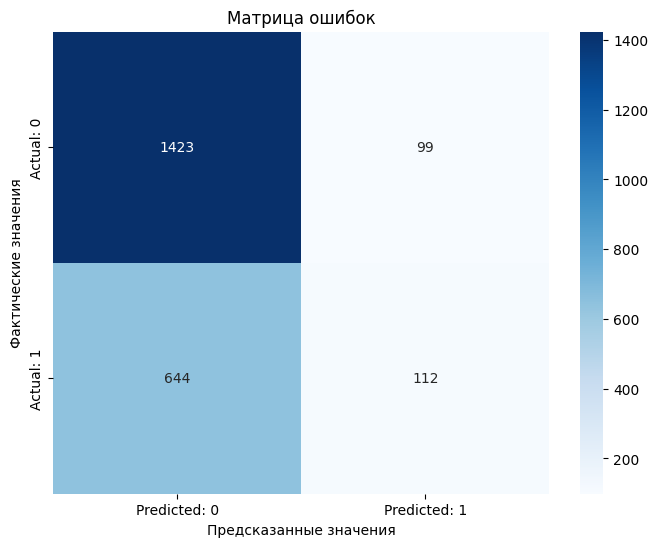

In [31]:
# Построение тепловой карты для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()

Продолжим изучение метрик. Что мы можем получить ещё из матрицы ошибок? Два важных показателя.

---

$Precision = \frac{TP}{TP+FP}$

Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

---

$Recall = \frac{TP}{TP+FN}$

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.5308056872037915
Recall: 0.14814814814814814


F1-мера - среднее гармоническое точности и полноты.

In [34]:
f1 = f1_score(y_test, knn_predictions)
print(f'F1: {f1}')

F1: 0.23164426059979318


<ipython-input-35-bafc1541feb6>:9: RuntimeWarning: invalid value encountered in divide
  z = 2*X*Y/(X+Y)


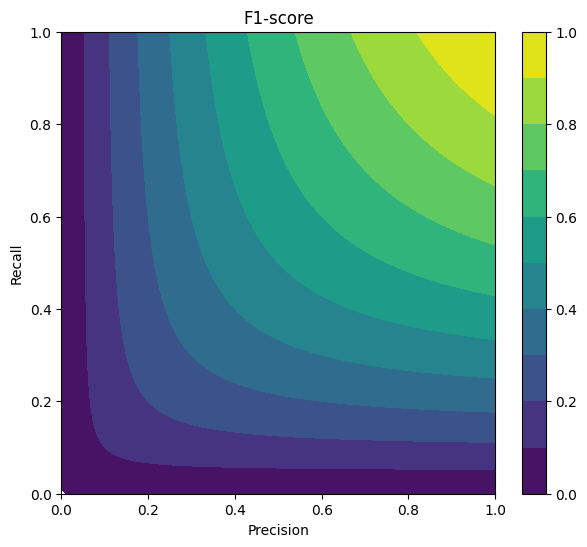

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
z = 2*X*Y/(X+Y)

fig, ax = plt.subplots(figsize=(7,6))
cs = ax.contourf(X, Y, z, locator=ticker.LinearLocator())
cbar = fig.colorbar(cs)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-score');

## Нормализация

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit_transform(x_train)

array([[-0.93331173,  1.41823729,  0.37955083, ..., -0.73272587,
         0.        , -0.82078582],
       [ 0.75040662,  1.62209156, -0.90264931, ..., -0.73272587,
         0.        ,  1.21834463],
       [-0.98141796,  1.41823729,  0.17223858, ..., -0.73272587,
         0.        , -0.82078582],
       ...,
       [ 0.55798167, -0.82415965, -0.8225118 , ..., -0.73272587,
         0.        ,  1.21834463],
       [ 0.50987543, -1.02801392,  1.46837567, ..., -0.73272587,
         0.        ,  1.21834463],
       [-0.4041431 ,  0.80667449, -0.35910795, ..., -0.73272587,
         0.        , -0.82078582]])

## Дисбаланс

Посмотрим на объемы данных в наших классах. Напишите код. чтобы сравнить их размеры:

Количество экземпляров в каждом классе:
Outcome
0    6027
1    3083
Name: count, dtype: int64


<ipython-input-47-ac32c3afa66e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


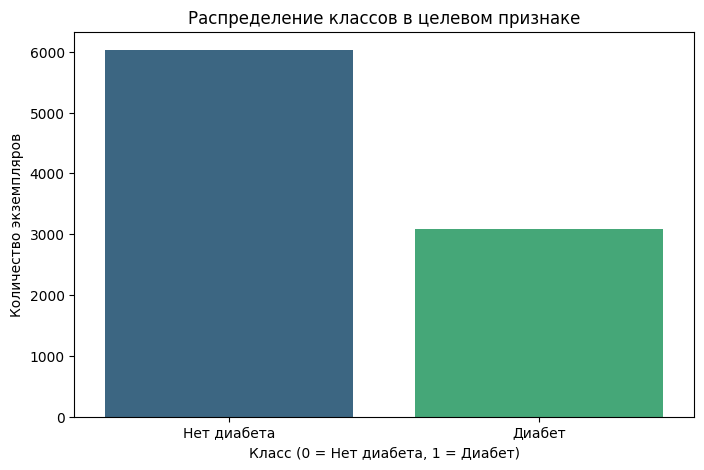

In [47]:
# Анализ дисбаланса классов
class_counts = df['Outcome'].value_counts()
print("Количество экземпляров в каждом классе:")
print(class_counts)

# Визуализация дисбаланса классов
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Распределение классов в целевом признаке')
plt.xlabel('Класс (0 = Нет диабета, 1 = Диабет)')
plt.ylabel('Количество экземпляров')
plt.xticks(ticks=[0, 1], labels=['Нет диабета', 'Диабет'])
plt.show()

Upsampling and Downsampling

Синтез

Размер обучающей выборки до синтеза: 6832
Размер обучающей выборки после синтеза: 9010
Количество экземпляров в каждом классе после синтеза:
Outcome
0    4505
1    4505
Name: count, dtype: int64


<ipython-input-48-1b82d89c5ec0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values, palette='viridis')


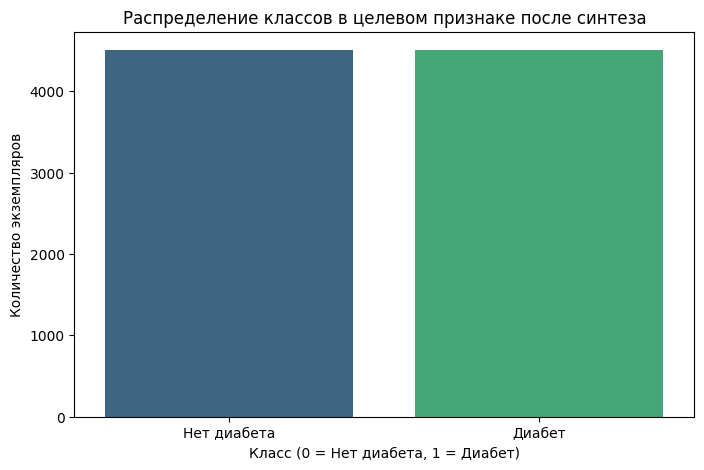

In [48]:
from imblearn.over_sampling import SMOTE

# Создание экземпляра SMOTE
smote = SMOTE(random_state=42)

# Применение SMOTE к обучающей выборке
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Сравнение размеров до и после синтеза
print(f'Размер обучающей выборки до синтеза: {x_train.shape[0]}')
print(f'Размер обучающей выборки после синтеза: {x_train_resampled.shape[0]}')

# Проверка распределения классов после синтеза
class_counts_resampled = pd.Series(y_train_resampled).value_counts()
print("Количество экземпляров в каждом классе после синтеза:")
print(class_counts_resampled)

# Визуализация распределения классов после синтеза
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values, palette='viridis')
plt.title('Распределение классов в целевом признаке после синтеза')
plt.xlabel('Класс (0 = Нет диабета, 1 = Диабет)')
plt.ylabel('Количество экземпляров')
plt.xticks(ticks=[0, 1], labels=['Нет диабета', 'Диабет'])
plt.show()

## Дерево решений

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = DecisionTreeClassifier(random_state=42)

In [42]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
pred = clf.predict(x_test)

In [44]:
accuracy_score(y_test, pred)

1.0

In [45]:
from sklearn import tree

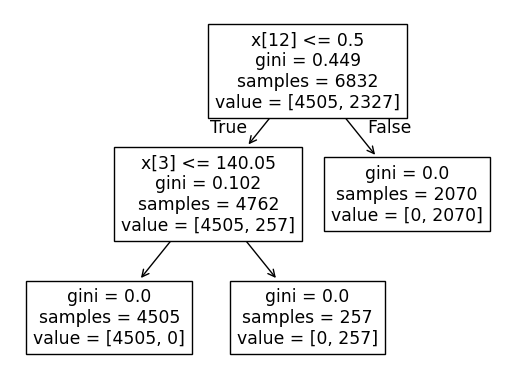

In [46]:
tree.plot_tree(clf);

## Кросс-валидация

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Создание экземпляра модели kNN
knn = KNeighborsClassifier(n_neighbors=10)

# Выполнение K-fold кросс-валидации
# Указываем количество фолдов, например, 5
k = 5
cv_scores = cross_val_score(knn, df.drop(['Outcome'], axis=1), df['Outcome'], cv=k)

# Вывод результатов кросс-валидации
print(f'Результаты кросс-валидации для {k} фолдов:')
print(cv_scores)
print(f'Средняя точность: {cv_scores.mean():.4f}')
print(f'Стандартное отклонение: {cv_scores.std():.4f}')

Результаты кросс-валидации для 5 фолдов:
[0.66739846 0.66684962 0.67563117 0.6712404  0.6712404 ]
Средняя точность: 0.6705
Стандартное отклонение: 0.0032
